In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.random import set_seed

from kaggle_prediction_interval_birthweight.data.data_processing import DataProcessor
from kaggle_prediction_interval_birthweight.workflow.validation import Validator
from kaggle_prediction_interval_birthweight.workflow.wildwood_tuning import (
    WildWoodTuner,
)

np.random.seed(1)
set_seed(1)

MODEL_TYPE = "WildWoodRegressor"

In [3]:
data = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/train.csv")
data_test = pd.read_csv("~/dev/data/kaggle-prediction-interval-birthweight/test.csv")

data_processor = DataProcessor(MODEL_TYPE)
X, y = data_processor(data)

In [4]:
tuner = WildWoodTuner(verbose=True)
tuner.tune(X, y)
tuner.result

Iteration No: 1 started. Evaluating function at random point.
{'n_estimators': 50, 'step': 93.93016234047931}
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 80.1516
Function value obtained: 478.2589
Current minimum: 478.2589
Iteration No: 2 started. Evaluating function at random point.
{'n_estimators': 33, 'step': 99.91364637917304}
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 51.4660
Function value obtained: 478.8840
Current minimum: 478.2589
Iteration No: 3 started. Evaluating function at random point.
{'n_estimators': 35, 'step': 45.69226545664236}
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 55.0342
Function value obtained: 479.0731
Current minimum: 478.2589
Iteration No: 4 started. Evaluating function at random point.
{'n_estimators': 38, 'step': 70.2771433123132}
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 59.2928
Function value obtained: 479.0384
Current minimum: 478.2589
Iteration No: 5 s

{'score': 477.99358983808935,
 'opt_parameters': {'n_estimators': 50, 'step': 10.842904388893036}}

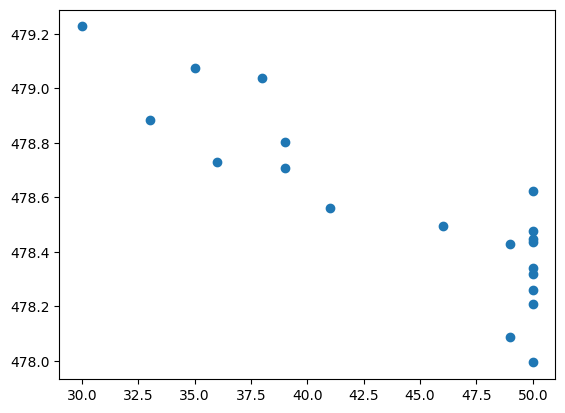

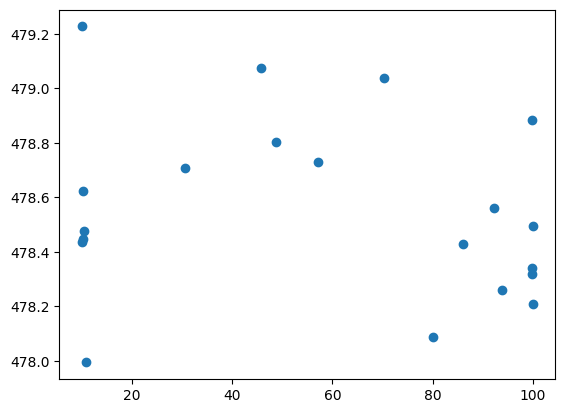

In [5]:
for which_param in range(2):
    x = [i[which_param] for i in tuner.res_gp.x_iters]
    plt.scatter(x, tuner.res_gp.func_vals)
    plt.show()

In [14]:
def plot_result(obs, lower, upper, lower_new, upper_new):
    fig, ax = plt.subplots(1, 3, figsize=(10, 3))
    ax[0].vlines(x=obs, ymin=lower, ymax=upper, alpha=0.25)
    ax[0].set_xlim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].set_ylim(
        np.min(np.concatenate([obs, lower])), np.max(np.concatenate([obs, upper]))
    )
    ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="orange")
    ax[0].set_xlabel("observations")
    ax[0].set_ylabel("predictions")
    ax[1].hist(lower, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[1].hist(
        lower_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[1].set_xlabel("predicted lower bounds")
    ax[1].legend()
    ax[2].hist(upper, bins=100, density=True, color="blue", alpha=0.75, label="train")
    ax[2].hist(
        upper_new, bins=100, density=True, color="orange", alpha=0.75, label="test"
    )
    ax[2].set_xlabel("predicted upper bounds")
    ax[2].legend()
    plt.show()


validator = Validator(MODEL_TYPE)
validator.fit(data)
validator.print_performance_summary()

lower, upper = validator.predict_intervals(data)
lower_new, upper_new = validator.predict_intervals(data_test)

plot_result(data["DBWT"], lower, upper, lower_new, upper_new)

Validation on fold 1 of 5 begins.
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


Validation on fold 2 of 5 begins.
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


Validation on fold 3 of 5 begins.
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


Validation on fold 4 of 5 begins.
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


Validation on fold 5 of 5 begins.
Calibrating with Mapie.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/regression/quantile_regression.py:201: UserWarning: WARNING: The alpha that is set needs to be the same as the alpha of your prefitted model in the following order [alpha/2, 1 - alpha/2, 0.5]
  warnings.warn(
/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


NOIS is 1610.3 and coverage is 90.1%.


/Users/hunter.merrill/Library/Caches/pypoetry/virtualenvs/kaggle-prediction-interval-birthweight-irFUtOWA-py3.11/lib/python3.11/site-packages/mapie/utils.py:537: UserWarning: WARNING: The predictions have issues.
The upper predictions are lower thanthe lower predictions at some points.
  warnings.warn(


KeyboardInterrupt: 